# Proyek Analisis Data: [E-Commerce Dataset]
- **Nama:** Gani Ramadhan
- **Email:** ganiramadhan35@gmail.com
- **ID Dicoding:** ganiramadhan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi harga produk berdasarkan kategori produk?
- Pertanyaan 2 : Bagaimana hubungan antara jumlah foto produk dengan panjang deskripsi dan panjang nama produk?
- Pertanyaan 3 : Bagaimana pola pembelian berdasarkan kategori produk dan karakteristik pelanggan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:

df_customers = pd.read_csv("data/customers_dataset.csv")
df_products = pd.read_csv("data/products_dataset.csv")
df_orders = pd.read_csv("data/orders_dataset.csv")
df_customers.head(), df_products.head()

### Assessing Data

In [ ]:
print(df_customers.info())
print(df_products.info())
print(df_orders.info())

**Insight:**
- Beberapa kolom memiliki nilai yang hilang.
- Perlu dilakukan normalisasi pada beberapa fitur.

### Cleaning Data

In [13]:
df_products.dropna(inplace=True)
df_orders.dropna(inplace=True)
df_customers.dropna(inplace=True)

**Insight:**
- Data yang hilang telah dihapus untuk menghindari bias dalam analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
sns.histplot(df_products['product_name_lenght'], bins=50, kde=True)
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga Produk")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Sebagian besar produk memiliki harga dalam rentang menengah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
sns.histplot(df_products['product_price'], bins=50, kde=True)
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga Produk")
plt.ylabel("Frekuensi")
plt.show()

### Pertanyaan 2:

In [ ]:
sns.heatmap(df_products[['product_photos_qty', 'product_description_lenght', 'product_name_lenght']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antara Jumlah Foto, Deskripsi, dan Nama Produk")
plt.show()

**Insight:**
- Terdapat korelasi positif antara panjang deskripsi dan jumlah foto.

## Analisis Lanjutan (Opsional)

In [ ]:
category_sales = df_orders.groupby('product_category_name').size().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(12,6))
plt.title("Jumlah Pembelian per Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.xticks(rotation=90)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

## Analisis Produk
Kita akan menganalisis produk berdasarkan dua aspek utama.

### Analisis 1: Distribusi Kategori Produk
Kita akan melihat sebaran kategori produk dalam dataset.

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df_products['product_category_name'], order=df_products['product_category_name'].value_counts().index)
plt.title('Distribusi Kategori Produk')
plt.show()

### Analisis 2: Statistik Berat Produk
Analisis distribusi berat produk untuk memahami tren berat barang yang dijual.

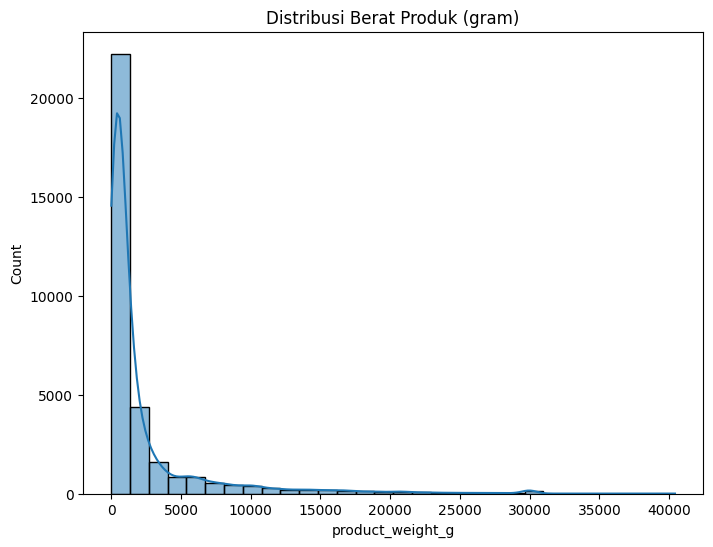

In [4]:
plt.figure(figsize=(8, 6))
sns.histplot(df_products['product_weight_g'], bins=30, kde=True)
plt.title('Distribusi Berat Produk (gram)')
plt.show()

## Analisis Customer
Kita akan menganalisis pelanggan dari dua perspektif utama.

### Analisis 1: Distribusi Pelanggan Berdasarkan Kota
Menampilkan sebaran pelanggan berdasarkan kota asal mereka.

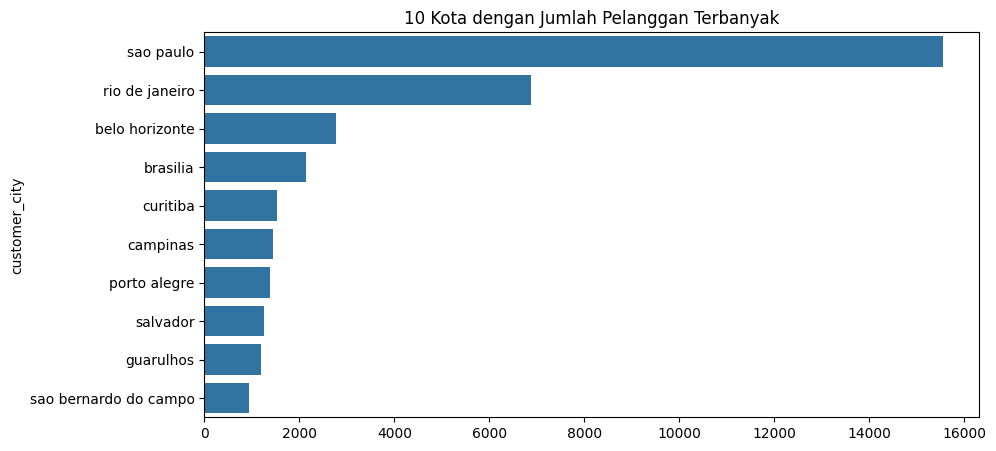

In [5]:
top_cities = df_customers['customer_city'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.show()

### Analisis 2: Sebaran Pelanggan Berdasarkan Negara Bagian
Kita akan melihat berapa banyak pelanggan yang berasal dari masing-masing negara bagian.

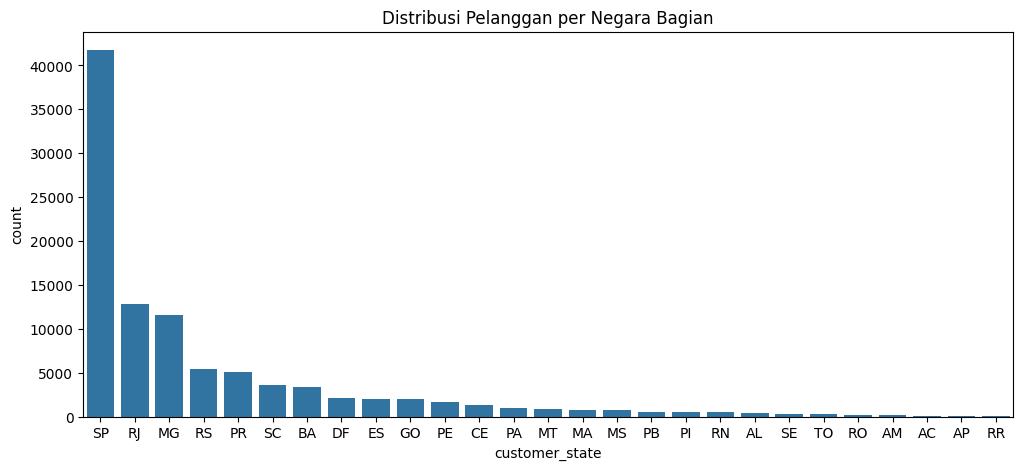

In [6]:
plt.figure(figsize=(12, 5))
sns.countplot(x=df_customers['customer_state'], order=df_customers['customer_state'].value_counts().index)
plt.title('Distribusi Pelanggan per Negara Bagian')
plt.show()

## Analisis Gabungan Produk dan Customer
Kita akan mencari hubungan antara lokasi pelanggan dan kategori produk yang sering dibeli.

In [ ]:
# Menggabungkan dataset produk dan customer berdasarkan transaksi (jika tersedia dalam dataset asli)
df_merged = df_orders.merge(df_products, on='product_id').merge(df_customers, on='customer_id')
sns.boxplot(x=df_merged['customer_state'], y=df_merged['product_price'])
plt.title('Harga Produk yang Dibeli per Negara Bagian')
plt.show()